In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [12]:
#Dataframe erstellen
df = pd.read_excel("~/downloads/Facebook.xlsx")

# Datensatz sehr groß, dh es werden nicht alle Spaltennamen ausgegebn -> Mit set_option kann man verschiedene Optionen verändern 
pd.set_option('display.max_columns', None)


# Entfernen von Leerzeichen und alles Kleinschreiben in Spaltennamen 
df.columns = df.columns.str.lower().str.replace(' ', '_')


#DF gekürzt und nur die benötigten Spalten werden jetzt ausgegeben 
df_gekuerzt = df.loc[ : , ["plattform", "ctr_(alle)", "klicks_(alle)", "frequenz", "reichweite", "seiteninteraktionen", "impressionen" ]]


# Nullwerte entfernen: 
df_gekuerzt = df_gekuerzt[(df_gekuerzt["ctr_(alle)"].notnull())]
df_gekuerzt = df_gekuerzt[(df_gekuerzt["klicks_(alle)"].notnull())]
df_gekuerzt = df_gekuerzt[(df_gekuerzt["frequenz"].notnull())]
df_gekuerzt = df_gekuerzt[(df_gekuerzt["reichweite"].notnull())]
df_gekuerzt = df_gekuerzt[(df_gekuerzt["seiteninteraktionen"].notnull())]
df_gekuerzt = df_gekuerzt[(df_gekuerzt["impressionen"].notnull())]















In [13]:
# Df wird nach Plattform gruppiert 
# Describe().T = Funktion gibt uns Auskunft üner die statistische  Daten des Df 
# T = transponsiert den Index und die Spalten 
df_gekuerzt.groupby(["plattform"]).describe().T

plattform                  Audience Network      Facebook      Instagram  \
ctr_(alle)          count      1.680000e+02  8.170000e+02      31.000000   
                    mean       1.352795e+00  2.566957e+00       0.666743   
                    std        1.029666e+00  3.184788e+00       0.475774   
                    min        0.000000e+00  0.000000e+00       0.000000   
                    25%        5.800809e-01  7.086220e-01       0.320604   
                    50%        9.448140e-01  1.402472e+00       0.655738   
                    75%        1.945484e+00  3.316301e+00       0.914743   
                    max        4.433446e+00  2.943582e+01       1.676544   
klicks_(alle)       count      1.680000e+02  8.170000e+02      31.000000   
                    mean       2.358500e+03  1.881818e+03     839.451613   
                    std        3.575776e+03  4.324016e+03    2265.318651   
                    min        0.000000e+00  0.000000e+00       0.000000   
                    25%        1.445000e+02  2.100000e+02       4.000000   
                    50%        8.850000e+02  5.680000e+02      35.000000   
                    75%        3.084750e+03  1.703000e+03     381.500000   
                    max        2.127500e+04  6.752300e+04   11870.000000   
frequenz            count      1.680000e+02  8.170000e+02      31.000000   
                    mean       3.121451e+00  1.815789e+00       1.274430   
                    std        2.161511e+00  2.589444e+00       0.388645   
                    min        1.190476e+00  0.000000e+00       1.000000   
                    25%        1.954103e+00  1.019121e+00       1.002766   
                    50%        2.516211e+00  1.205427e+00       1.108774   
                    75%        3.453393e+00  1.855708e+00       1.377310   
                    max        1.966174e+01  6.027079e+01       2.575455   
reichweite          count      1.680000e+02  8.170000e+02      31.000000   
                    mean       4.467230e+04  7.238115e+04   46916.870968   
                    std        4.633631e+04  1.406422e+05   82612.952049   
                    min        8.000000e+00  0.000000e+00     101.000000   
                    25%        9.585000e+03  1.132300e+04    1621.000000   
                    50%        2.989700e+04  3.308900e+04    4352.000000   
                    75%        6.172150e+04  7.050100e+04   62074.000000   
                    max        2.046530e+05  1.863948e+06  373292.000000   
seiteninteraktionen count      1.680000e+02  8.170000e+02      31.000000   
                    mean       2.660494e+03  4.443277e+03    8301.129032   
                    std        4.085996e+03  1.794091e+04   17238.476585   
                    min        2.000000e+00  1.000000e+00       1.000000   
                    25%        2.745000e+02  1.730000e+02      60.500000   
                    50%        1.017500e+03  5.430000e+02     265.000000   
                    75%        3.319500e+03  1.758000e+03    4979.500000   
                    max        2.767200e+04  3.151590e+05   62194.000000   
impressionen        count      1.680000e+02  8.170000e+02      31.000000   
                    mean       1.494851e+05  1.699185e+05   79684.741935   
                    std        2.036021e+05  5.380974e+05  154325.089773   
                    min        5.400000e+01  0.000000e+00     101.000000   
                    25%        2.117200e+04  1.361000e+04    1711.500000   
                    50%        8.126100e+04  4.384500e+04    4387.000000   
                    75%        1.849585e+05  1.401970e+05   76315.000000   
                    max        1.324565e+06  1.103335e+07  743670.000000   

plattform                     Messenger  
ctr_(alle)          count     14.000000  
                    mean       0.642560  
                    std        0.303775  
                    min        0.189125  
                    25%        0.422316  
                    50%

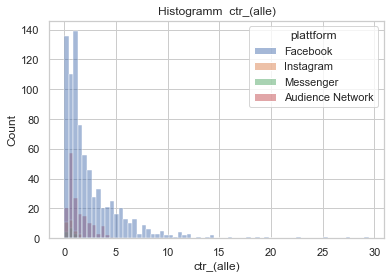

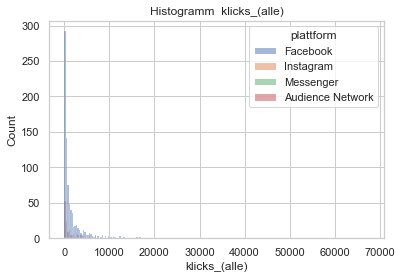

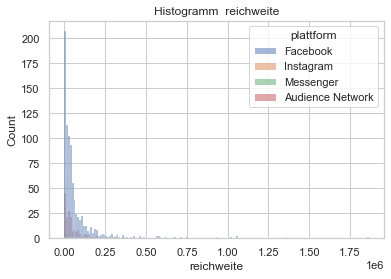

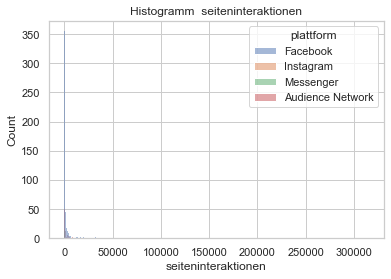

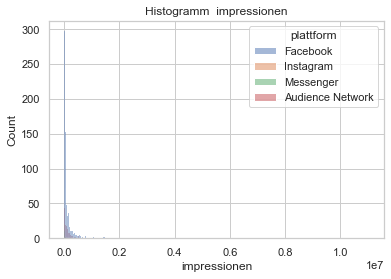

In [14]:
# Loop, um die die 
liste = ['ctr_(alle)', 'klicks_(alle)', 'reichweite', 'seiteninteraktionen', 'impressionen']
for i in liste:
    sns.histplot(x=i, data=df_gekuerzt,  hue="plattform")
    plt.title("Histogramm  " + i)
    plt.show()

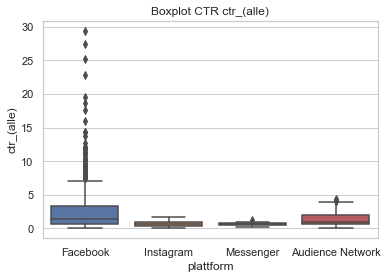

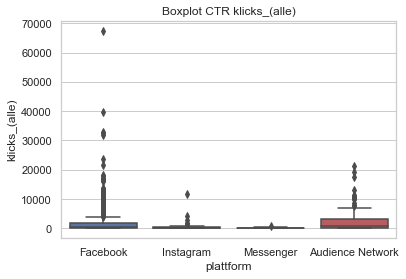

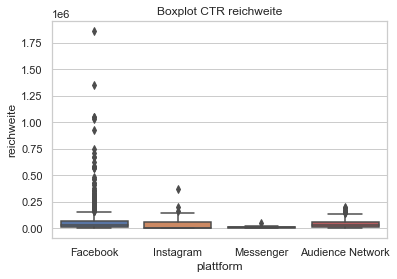

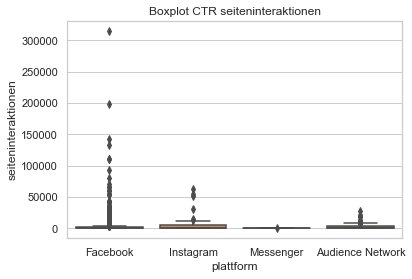

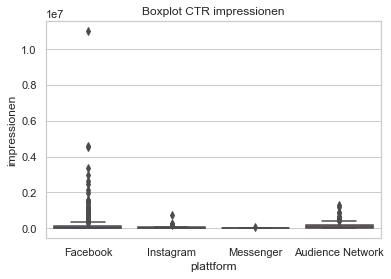

In [15]:
for i in liste:
    sns.boxplot(y=i, x="plattform", data=df_gekuerzt)
    plt.title("Boxplot CTR " + i)
    plt.show()

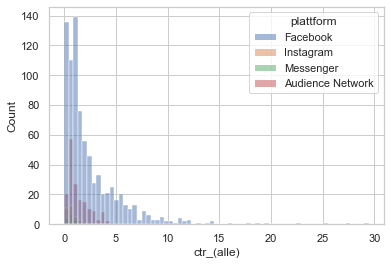

In [16]:
histCTR = sns.histplot(data=df_gekuerzt, x="ctr_(alle)", hue="plattform")

b)  Interpretieren Sie jede der statistischen Kennzahlen und Abbildungen aus a) am Beispiel der Ergebnisse für “Klicks”:

Wir erkennen, dass Facebook mehr Ausreisser hat und mehr Klicks. 



Aufgabe C) 

In [17]:
# Wir erstellen ein neues DF: 
df_C = df.loc[ : , ["plattform", "ausgegebener_betrag_(eur)", "cpm_(kosten_pro_1.000_impressionen)_(eur)", "kosten_pro_1.000_erreichten_personen_(eur)", "kosten_pro_individuellem_link-klick_(eur)", "cpc_(alle)_(eur)", "cpc_(kosten_pro_link-klick)_(eur)","kosten_pro_geteiltem_beitrag_(eur)","kosten_pro_beitragsreaktion_(eur)", "kosten_pro_„gefällt_mir“_für_seite_(eur)"]]

In [18]:

median = df_C.groupby(["plattform"]).median()
median

,ausgegebener_betrag_(eur),cpm_(kosten_pro_1.000_impressionen)_(eur),kosten_pro_1.000_erreichten_personen_(eur),kosten_pro_individuellem_link-klick_(eur),cpc_(alle)_(eur),cpc_(kosten_pro_link-klick)_(eur),kosten_pro_geteiltem_beitrag_(eur),kosten_pro_beitragsreaktion_(eur),kosten_pro_„gefällt_mir“_für_seite_(eur)
plattform,,,,,,,,,
Audience Network,134.485612,1.806672,4.793956,0.175596,0.149365,0.152296,NaN,269.762737,NaN
Facebook,114.000000,2.728159,3.587830,0.792252,0.204681,0.715356,20.766224,1.999167,8.653846
Instagram,50.434498,5.010714,6.829637,0.959650,0.645487,0.932945,18.850000,0.636216,NaN
Messenger,60.825000,5.764428,7.503431,0.957504,0.944211,0.957117,NaN,NaN,NaN
Nicht kategorisiert,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN


In [19]:
standardabweichung = df_C.groupby(["plattform"]).std()
standardabweichung

,ausgegebener_betrag_(eur),cpm_(kosten_pro_1.000_impressionen)_(eur),kosten_pro_1.000_erreichten_personen_(eur),kosten_pro_individuellem_link-klick_(eur),cpc_(alle)_(eur),cpc_(kosten_pro_link-klick)_(eur),kosten_pro_geteiltem_beitrag_(eur),kosten_pro_beitragsreaktion_(eur),kosten_pro_„gefällt_mir“_für_seite_(eur)
plattform,,,,,,,,,
Audience Network,363.935516,1.789677,4.829882,0.247390,0.251459,0.248726,NaN,NaN,NaN
Facebook,599.448193,2.582711,4.957066,35.421799,0.273728,34.160246,117.421111,17.990308,48.318077
Instagram,580.548736,3.421411,4.319122,1.648818,1.268368,1.632136,30.359664,0.785372,NaN
Messenger,157.238704,2.196998,3.690730,0.319450,0.322592,0.210591,NaN,NaN,NaN
Nicht kategorisiert,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN


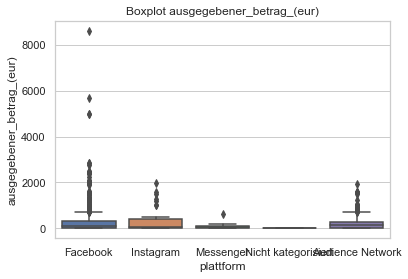

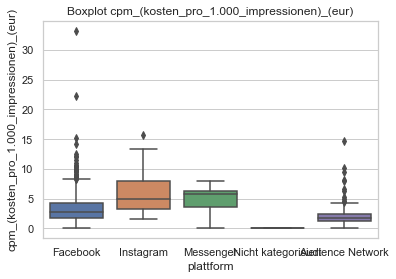

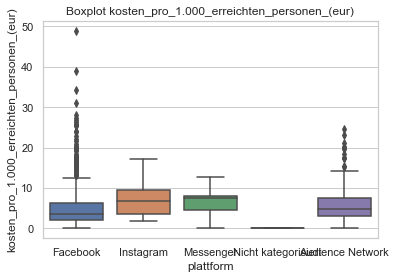

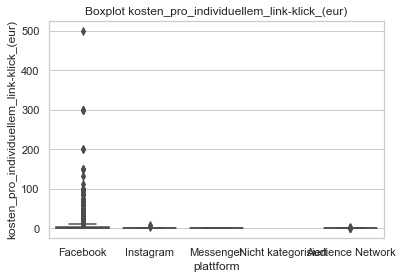

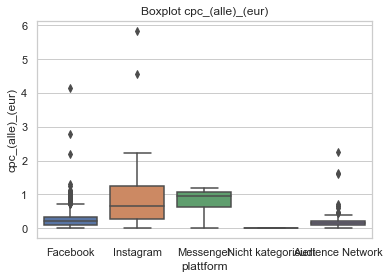

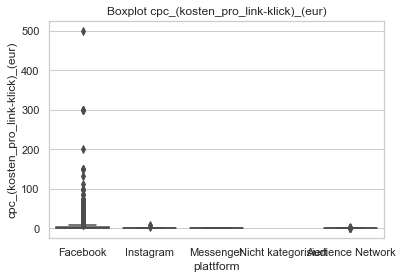

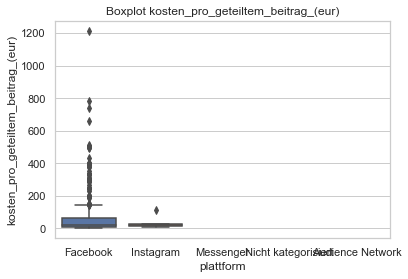

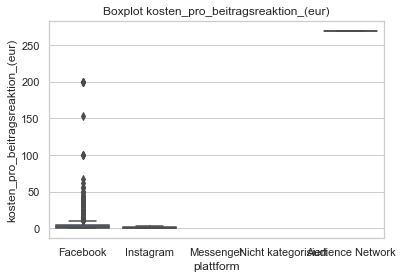

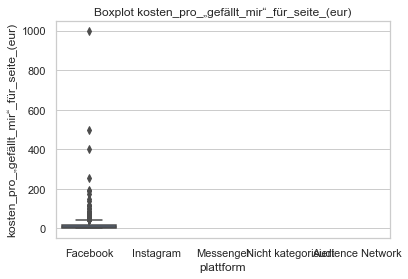

In [20]:
liste_C = ["ausgegebener_betrag_(eur)", "cpm_(kosten_pro_1.000_impressionen)_(eur)", "kosten_pro_1.000_erreichten_personen_(eur)", "kosten_pro_individuellem_link-klick_(eur)", "cpc_(alle)_(eur)", "cpc_(kosten_pro_link-klick)_(eur)","kosten_pro_geteiltem_beitrag_(eur)","kosten_pro_beitragsreaktion_(eur)", "kosten_pro_„gefällt_mir“_für_seite_(eur)"]
for i in liste_C:
    sns.boxplot(x="plattform",y=i, data=df_C)
    plt.title("Boxplot " + i)
    plt.show()

d) Hypothesentest: 

Hypothese: Es gibt keinen Unterschied des CPC (Kosten pro Link-Klick) in den beiden Plattformen Facebook und Instagram -> Nullhypothese

Ich habe mich für den unabhängingen T-Test entschieden, weil die beiden Plattformen nicht die gleichen Voraussetzungen haben, sprich die Standardabweichung ist auf Facebook höher und Instagram hat einen höheren Mittelwert. 

Wir führen einen Zweistichproben-t-Test

In [21]:
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [22]:
# Die zwei Gruppen Facebook und Instagram erstellen: 
# Spalten ohne Werte entfernen: 
df_C2 = df_C[(df_C["cpc_(kosten_pro_link-klick)_(eur)"].notnull())]

facebook = df_C2[(df_C2["plattform"] == "Facebook")]

instagram = df_C2[(df_C2["plattform"] == "Instagram")]



In [23]:
# T-Test durchführen: 
ttest_ind(facebook['cpc_(kosten_pro_link-klick)_(eur)'], instagram['cpc_(kosten_pro_link-klick)_(eur)'])

Ttest_indResult(statistic=1.1644195808072024, pvalue=0.2446287663560081)

Da T bei uns sehr groß ist, können wir sagen, dass es die Nullhypothese abgelgt werden kann, da wir eine starke Differenz haben.  
Außerdem ist unser P-Wert größer als 0,05. Dies zeigt uns, dass wir die Nullhypothese nicht annehmen. 